# HOUSE PRICE PREDICTION USING REGRESSION MODEL

# Loading Data Set

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
#LOADING DATASET
data = pd.read_csv("housing.csv")

In [55]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# Data Exploration

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [57]:
data.dropna(inplace=True)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [59]:
from sklearn.model_selection import train_test_split
x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [60]:
x


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [61]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [63]:
train_data= x_train.join(y_train)

In [64]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
11876,-117.37,34.01,15.0,1386.0,247.0,703.0,185.0,3.6415,INLAND,124200.0
17000,-122.26,37.56,23.0,7283.0,1342.0,3399.0,1298.0,5.6683,NEAR BAY,391000.0
16617,-120.86,35.39,23.0,1664.0,355.0,629.0,279.0,2.7344,NEAR OCEAN,188300.0
18197,-122.00,37.39,36.0,1236.0,229.0,880.0,247.0,5.7910,<1H OCEAN,239400.0
14410,-117.23,32.79,23.0,2578.0,665.0,989.0,622.0,3.5484,NEAR OCEAN,238000.0
...,...,...,...,...,...,...,...,...,...,...
7363,-118.20,33.97,28.0,2474.0,702.0,2830.0,694.0,2.7540,<1H OCEAN,166200.0
17252,-119.71,34.42,52.0,1838.0,692.0,851.0,576.0,1.4851,<1H OCEAN,237500.0
9533,-120.75,37.44,27.0,2295.0,424.0,1252.0,350.0,3.6182,INLAND,123200.0
6051,-117.75,34.04,22.0,2948.0,636.0,2600.0,602.0,3.1250,INLAND,113600.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

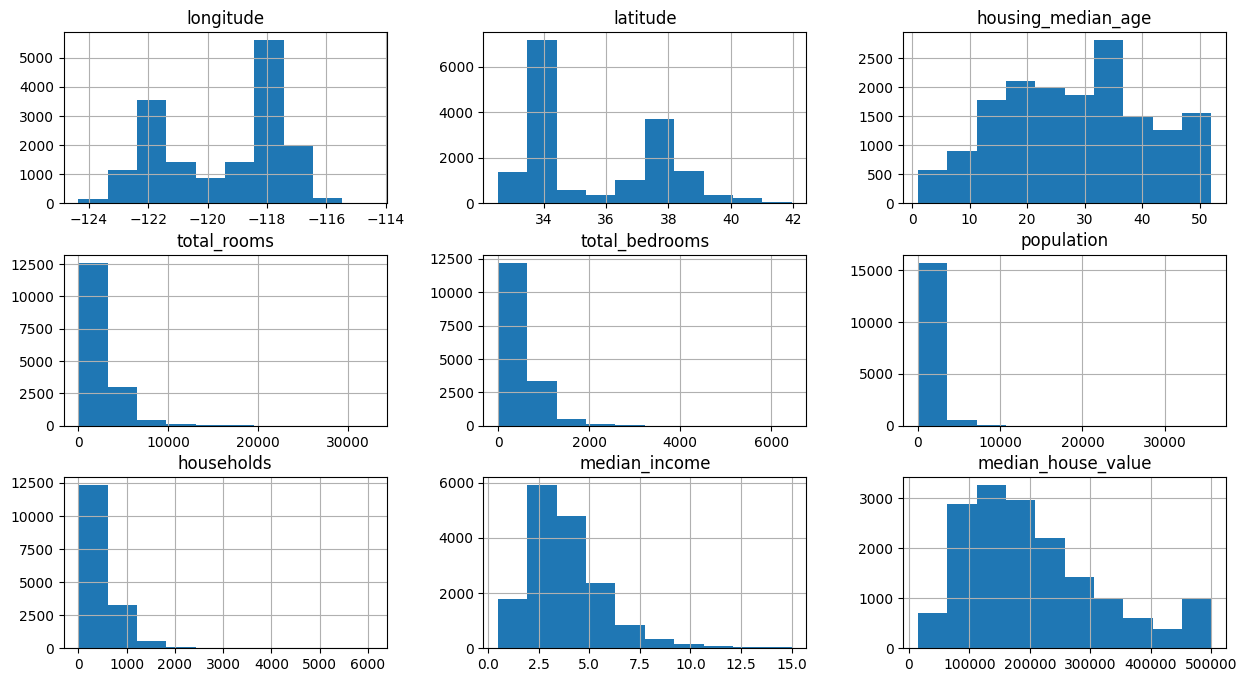

In [65]:
train_data.hist(figsize=(15,8))

In [66]:
train_data.corr()

<ipython-input-66-8d2cc80a8830>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924624,-0.108686,0.044004,0.066637,0.098040,0.053806,-0.013121,-0.044334
latitude,-0.924624,1.000000,0.010630,-0.037607,-0.066495,-0.107765,-0.071261,-0.080963,-0.145304
housing_median_age,-0.108686,0.010630,1.000000,-0.358687,-0.317677,-0.291357,-0.299611,-0.116902,0.109613
total_rooms,0.044004,-0.037607,-0.358687,1.000000,0.929700,0.856202,0.920064,0.203656,0.135313
total_bedrooms,0.066637,-0.066495,-0.317677,0.929700,1.000000,0.876683,0.980554,-0.003284,0.051387
population,0.098040,-0.107765,-0.291357,0.856202,0.876683,1.000000,0.905063,0.008802,-0.026482
households,0.053806,-0.071261,-0.299611,0.920064,0.980554,0.905063,1.000000,0.017949,0.066289
median_income,-0.013121,-0.080963,-0.116902,0.203656,-0.003284,0.008802,0.017949,1.000000,0.687043
median_house_value,-0.044334,-0.145304,0.109613,0.135313,0.051387,-0.026482,0.066289,0.687043,1.000000


<ipython-input-67-7808065651ec>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap (train_data.corr(), annot=True, cmap="YlGnBu")


<Axes: >

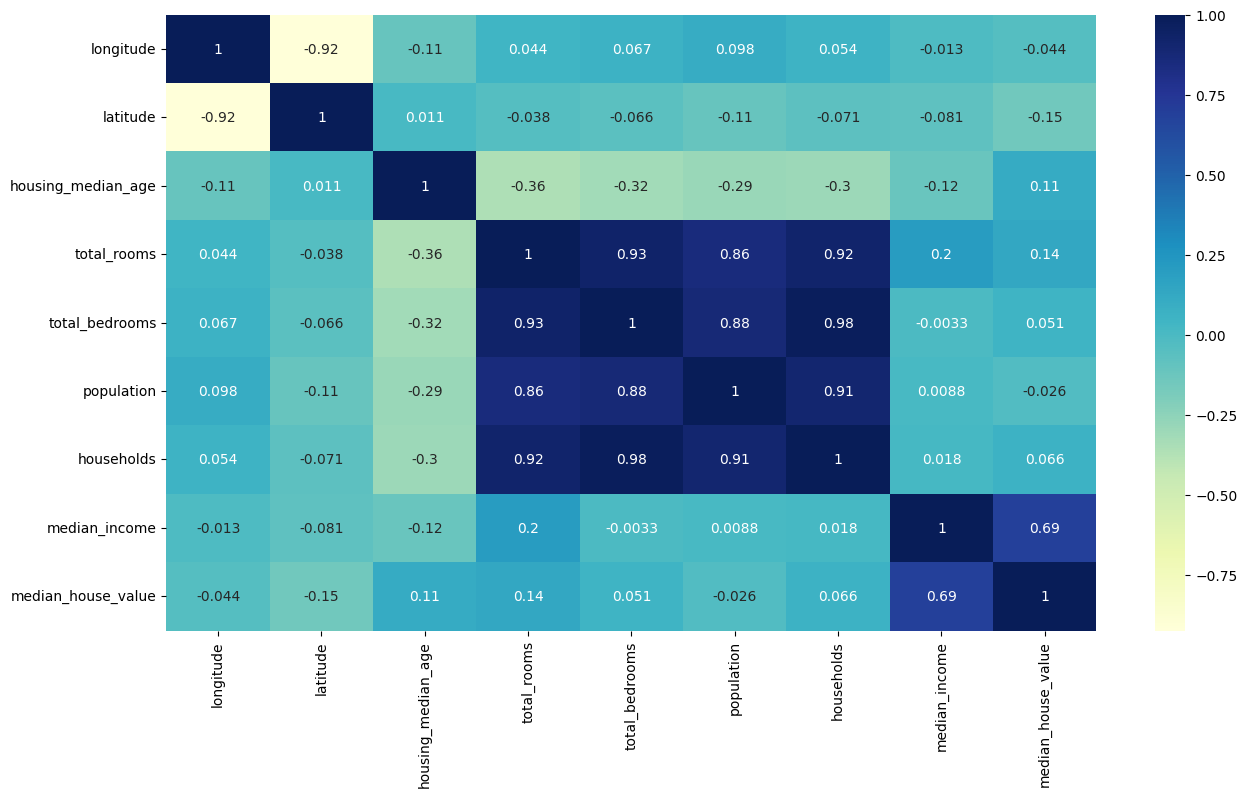

In [67]:
plt.figure(figsize=(15,8))
sns.heatmap (train_data.corr(), annot=True, cmap="YlGnBu")

# Data Preprocessing

In [68]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

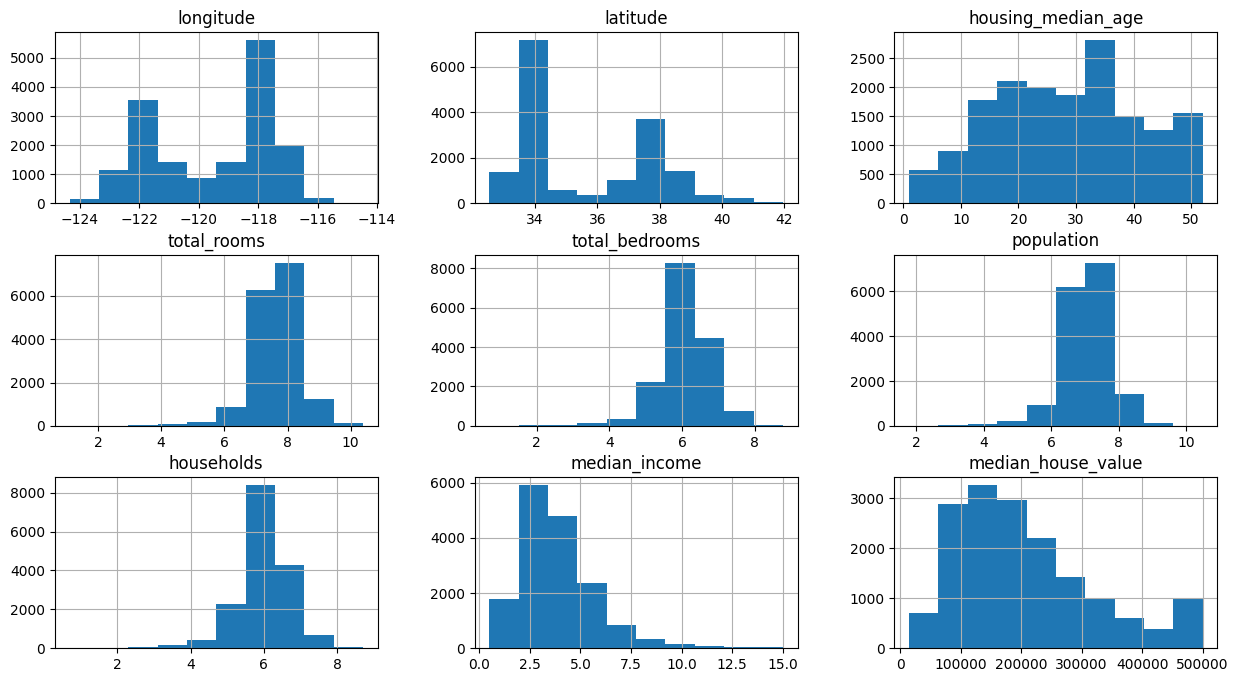

In [69]:
train_data.hist(figsize=(15,8))

In [70]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7206
INLAND        5230
NEAR OCEAN    2090
NEAR BAY      1815
ISLAND           5
Name: ocean_proximity, dtype: int64

In [71]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_data['ocean_proximity_encoded'] = label_encoder.fit_transform(train_data['ocean_proximity'])
train_data = train_data.drop(['ocean_proximity'], axis=1)

In [72]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_encoded
11876,-117.37,34.01,15.0,7.234898,5.513429,6.556778,5.225747,3.6415,124200.0,1
17000,-122.26,37.56,23.0,8.893435,7.202661,8.131531,7.169350,5.6683,391000.0,3
16617,-120.86,35.39,23.0,7.417580,5.874931,6.445720,5.634790,2.7344,188300.0,4
18197,-122.00,37.39,36.0,7.120444,5.438079,6.781058,5.513429,5.7910,239400.0,0
14410,-117.23,32.79,23.0,7.855157,6.501290,6.897705,6.434547,3.5484,238000.0,4
...,...,...,...,...,...,...,...,...,...,...
7363,-118.20,33.97,28.0,7.813996,6.555357,7.948385,6.543912,2.7540,166200.0,0
17252,-119.71,34.42,52.0,7.516977,6.541030,6.747587,6.357842,1.4851,237500.0,0
9533,-120.75,37.44,27.0,7.738924,6.052089,7.133296,5.860786,3.6182,123200.0,1
6051,-117.75,34.04,22.0,7.989221,6.456770,7.863651,6.401917,3.1250,113600.0,1


<Axes: >

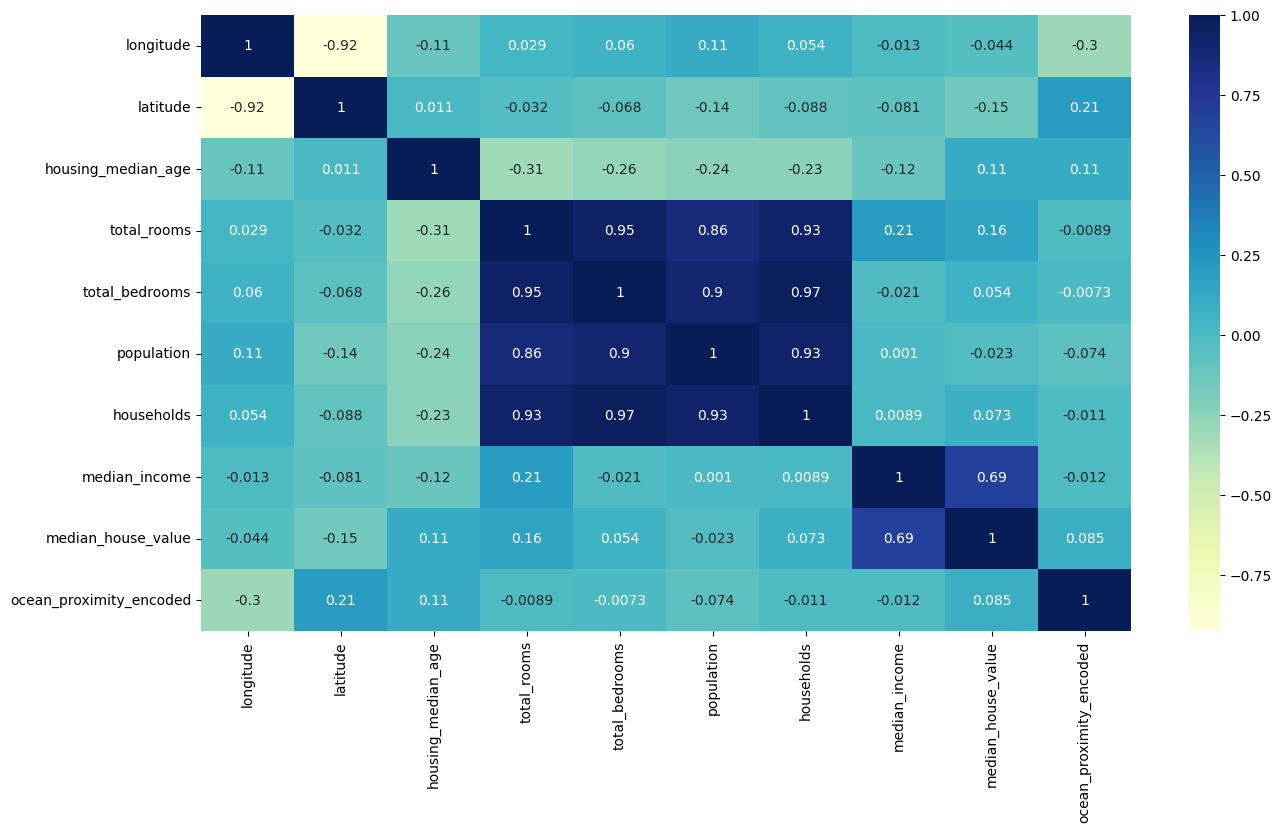

In [73]:
plt.figure(figsize=(15,8))
sns.heatmap (train_data.corr(), annot=True, cmap="YlGnBu")

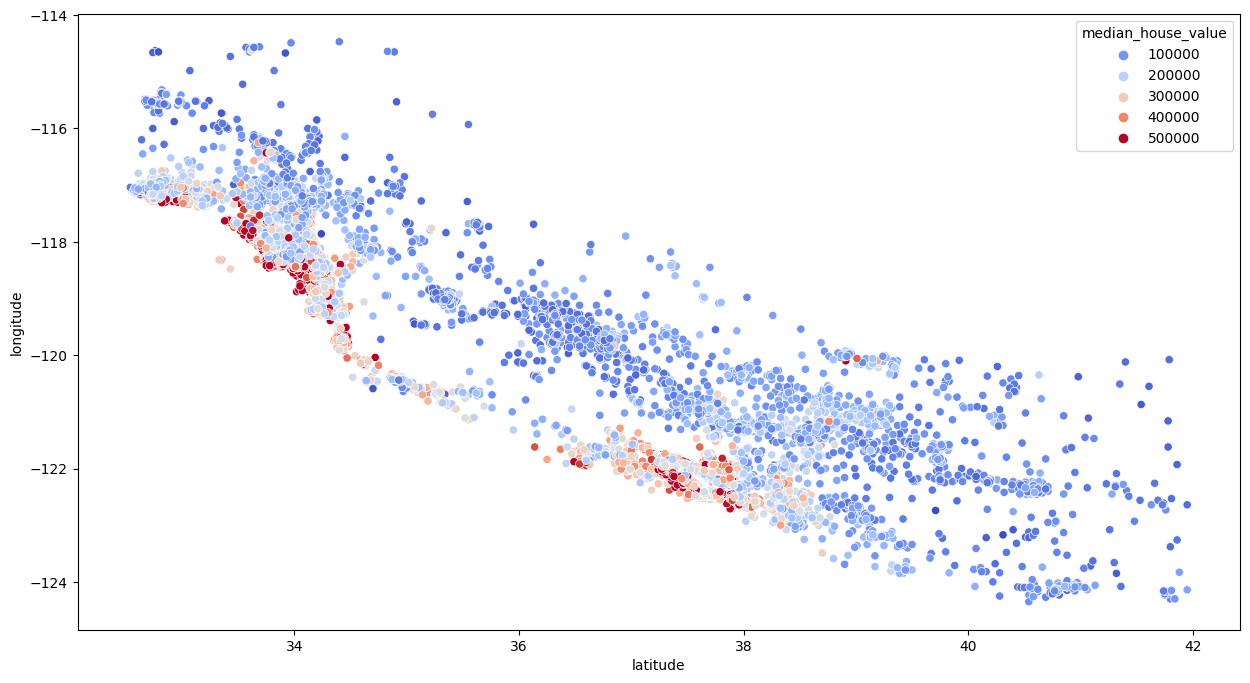

In [74]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")
plt.show()

# Feature Engineering

In [75]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']


<Axes: >

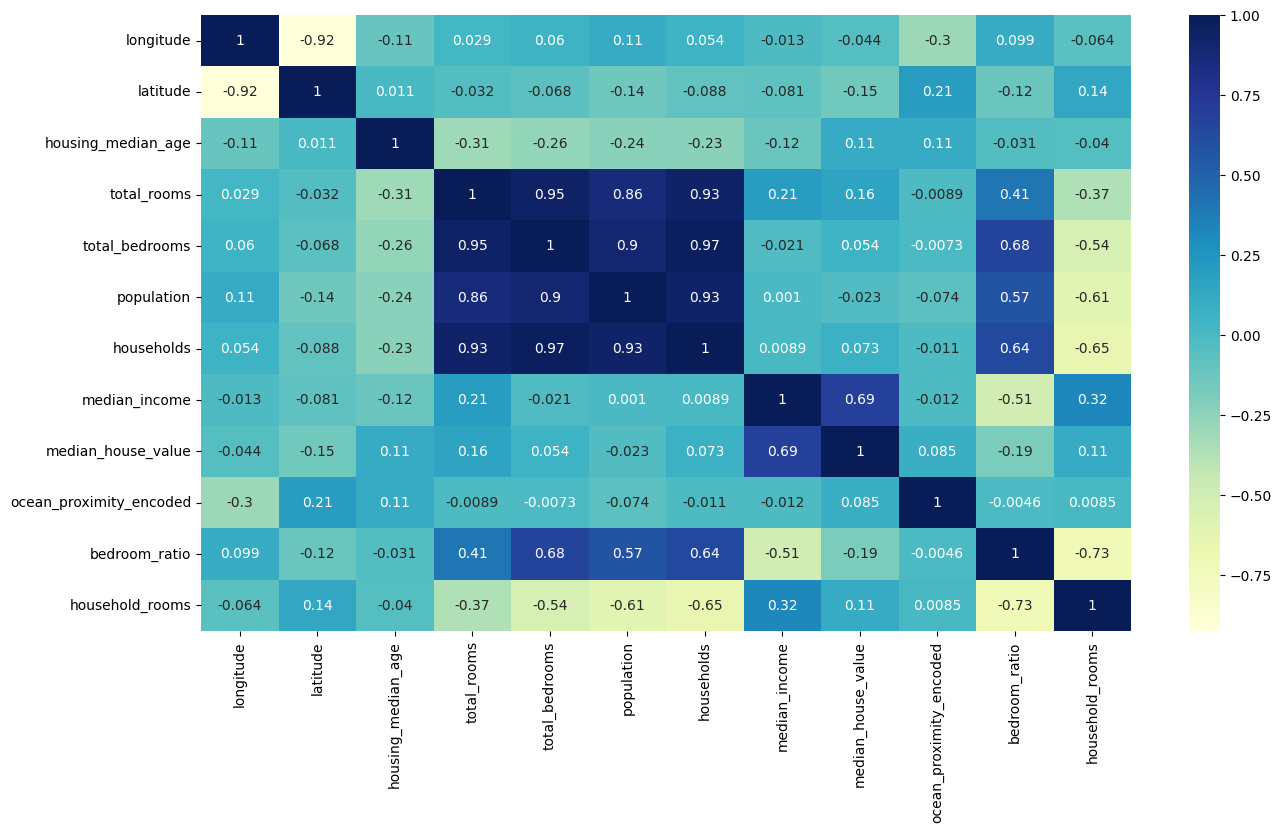

In [76]:
plt.figure(figsize=(15,8))
sns.heatmap (train_data.corr(), annot=True, cmap="YlGnBu")

# Linear Regression Model

In [77]:
from sklearn.linear_model import LinearRegression
x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [78]:
test_data= x_test.join(y_test)
test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)


test_data['ocean_proximity_encoded'] = label_encoder.fit_transform(test_data['ocean_proximity'])
test_data = test_data.drop(['ocean_proximity'], axis=1)


test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [79]:
x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [80]:
x_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_encoded,bedroom_ratio,household_rooms
11876,-117.37,34.01,15.0,7.234898,5.513429,6.556778,5.225747,3.6415,1,0.762060,1.384472
17000,-122.26,37.56,23.0,8.893435,7.202661,8.131531,7.169350,5.6683,3,0.809885,1.240480
16617,-120.86,35.39,23.0,7.417580,5.874931,6.445720,5.634790,2.7344,4,0.792028,1.316390
18197,-122.00,37.39,36.0,7.120444,5.438079,6.781058,5.513429,5.7910,0,0.763728,1.291473
14410,-117.23,32.79,23.0,7.855157,6.501290,6.897705,6.434547,3.5484,4,0.827646,1.220779
...,...,...,...,...,...,...,...,...,...,...,...
7363,-118.20,33.97,28.0,7.813996,6.555357,7.948385,6.543912,2.7540,0,0.838925,1.194086
17252,-119.71,34.42,52.0,7.516977,6.541030,6.747587,6.357842,1.4851,0,0.870168,1.182316
9533,-120.75,37.44,27.0,7.738924,6.052089,7.133296,5.860786,3.6182,1,0.782032,1.320458
6051,-117.75,34.04,22.0,7.989221,6.456770,7.863651,6.401917,3.1250,1,0.808185,1.247942


In [81]:
x_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_encoded,bedroom_ratio,household_rooms
1216,-120.79,38.24,19.0,6.911747,5.463832,6.289716,5.252273,2.9821,1,0.790514,1.315953
4378,-118.27,34.09,52.0,8.078998,6.638568,7.352441,6.566672,3.9674,0,0.821707,1.230303
10453,-117.66,33.46,28.0,7.140453,5.455321,6.413459,5.493061,5.1024,0,0.764002,1.299904
5079,-118.30,33.98,52.0,7.224025,5.755742,6.894670,5.627621,2.9432,0,0.796750,1.283673
13372,-117.51,34.14,21.0,7.806289,5.945421,6.998510,5.793014,4.6437,1,0.761619,1.347535
...,...,...,...,...,...,...,...,...,...,...,...
5978,-117.74,34.11,28.0,8.159089,6.340359,7.238497,6.259581,5.3637,1,0.777092,1.303456
2121,-119.70,36.75,11.0,8.196161,6.659294,7.506592,6.595781,2.4956,1,0.812489,1.242637
14705,-117.06,32.81,17.0,8.278936,6.311735,7.435438,6.317165,6.7927,0,0.762385,1.310546
8254,-118.17,33.77,45.0,7.827640,6.682109,7.201171,6.580639,2.6786,3,0.853656,1.189495


In [82]:
reg.score(x_test,y_test)

0.6647999722941728